In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_circles
from matplotlib_venn import venn2

In [2]:
Lines= []
f = open(r'C:\Users\katuwawalaai\Subcellular_Mapping\GOA_TSV.tsv')
for line in f:
    data_line = line.rstrip().split('\t')
    Lines.append(data_line)

In [3]:
GO_Uniprot=[]
GO_Code=[]
GO_Evidence=[]
GO_Aspect=[]
b =0
for b in range(0,len(Lines),1):
    GO_Uniprot.append(Lines[b][1])
    GO_Code.append(Lines[b][4])
    GO_Evidence.append(Lines[b][6])
    GO_Aspect.append(Lines[b][8])

In [4]:
file= (r"C:\Users\katuwawalaai\Subcellular_Mapping\Compartment_Map.csv")
Compartment_Map = pd.read_csv(file)
Compartment_Map.head()

,cell membrane,cell junction,cell projection,cytoplasm(excludes the children of the organelles and their membranes),nucleus,ribosome,cytoskeleton,centrosome,mitochondrion,endoplasmic reticulum,...,nuclear membrane,mitochondrial membrane,endoplasmic reticulum membrane,Golgi membrane,lysosomal membrane,vacuolar membrane,peroxisomal membrane,endosome membrane,chloroplast membrane,other membranes (excludes the children of the membrane(GO:0016020)) which belogs to the considered organells and their membranes
0,plasma membrane(GO:0005886),cell junction(GO:0030054),cell projection(GO:0042995),cytoplasm(GO:0005737),chromosome(GO:0005694),ribosome(GO:0005840),cytoskeleton(GO:0005856),centrosome(GO:0005813),mitochondrion(GO:0005739),endoplasmic reticulum(GO:0005783),...,nuclear membrane(GO:0031965),mitochondrial membrane(GO:0031966),endoplasmic reticulum membrane(GO:0005789),Golgi membrane(GO:0000139),lysosomal membrane(GO:0005765),vacuolar membrane(GO:0005774),peroxisomal membrane(GO:0005778),endosome membrane(GO:0010008),chloroplast membrane(GO:0031969),membrane(GO:0016020)
1,cell wall(GO:0005618),extracellular region(GO:0005576),synapse(GO:0045202),"alpha,alpha-trehalose-phosphate synthase compl...",nucleus(GO:0005634),cytosolic large ribosomal subunit(GO:0022625),aster(GO:0005818),centriole(GO:0005814),mitochondrial envelope(GO:0005740),sarcoplasmic reticulum(GO:0016529),...,nuclear outer membrane(GO:0005640),mitochondrial respiratory chain complex I(GO:0...,Ssh1 translocon complex(GO:0071261),integral to Golgi membrane(GO:0030173),NaN,plant-type vacuole membrane(GO:0009705),integral to peroxisomal membrane(GO:0005779),integral to endosome membrane(GO:0031303),Tic complex(GO:0031897),endomembrane system(GO:0012505)
2,cell surface(GO:0009986),laminin-11 complex(GO:0043260),excitatory synapse(GO:0060076),cytoplasmic part(GO:0044444),perichromatin fibrils(GO:0005726),mitochondrial small ribosomal subunit(GO:0005763),kinesin II complex(GO:0016939),centriolar satellite(GO:0034451),fatty acid beta-oxidation multienzyme complex(...,GET complex(GO:0043529),...,nuclear inner membrane(GO:0005637),mitochondrial inner membrane protein insertion...,Sec62/Sec63 complex(GO:0031207),COPI vesicle coat(GO:0030126),NaN,lysosomal membrane(GO:0005765),extrinsic to intraperoxisomal membrane(GO:0005...,extrinsic to endosome membrane(GO:0031313),chloroplast inner membrane(GO:0009706),chloride channel complex(GO:0034707)
3,periplasmic space(GO:0042597),host cell microsome(GO:0044189),stereocilium membrane(GO:0060171),extrinsic to plastid membrane(GO:0035452),cohesin complex(GO:0008278),cytosolic ribosome(GO:0022626),dynein complex(GO:0030286),centrosomal corona(GO:0031592),intracellular ferritin complex(GO:0008043),mannosyltransferase complex(GO:0031501),...,extrinsic to nuclear outer membrane(GO:0031316),mitochondrial proton-transporting ATP synthase...,signal peptidase complex(GO:0005787),AP-1 adaptor complex(GO:0030121),NaN,integral to fungal-type vacuolar membrane(GO:0...,glyoxysomal membrane(GO:0046861),multivesicular body membrane(GO:0032585),integral to chloroplast outer membrane(GO:0031...,proton-transporting two-sector ATPase complex(...
4,primary cell wall(GO:0009530),extracellular vesicular exosome(GO:0070062),pseudopodium membrane(GO:0031260),outer acrosomal membrane(GO:0002081),SAGA-type complex(GO:0070461),small ribosomal subunit(GO:0015935),"gamma-tubulin small complex, spindle pole body...",spindle pole centrosome(GO:0031616),sulfite reductase complex (NADPH)(GO:0009337),endoplasmic reticulum tubular network(GO:0071782),...,integral to nuclear inner membrane(GO:0005639),intrinsic to mitochondrial outer membrane(GO:0...,TAP complex(GO:0042825),trans-Golgi network(GO:0005802),NaN,protein storage vacuole membrane(GO:0032586),NaN,ESCRT III complex(GO:0000815),integral to chloroplast inner membrane(GO:0031...,"proton-transporting V-type ATPase, V0 domain(G..."


In [5]:
cellmembrane_Text= Compartment_Map.iloc[:,0].values
celljunction_Text= Compartment_Map.iloc[:,1].values
cellprojection_Text= Compartment_Map.iloc[:,2].values
cytoplasm_Text= Compartment_Map.iloc[:,3].values
nucleus_Text= Compartment_Map.iloc[:,4].values
ribosome_Text= Compartment_Map.iloc[:,5].values
cytoskeleton_Text= Compartment_Map.iloc[:,6].values
centrosome_Text= Compartment_Map.iloc[:,7].values
mitochondrion_Text= Compartment_Map.iloc[:,8].values
ER_Text= Compartment_Map.iloc[:,9].values
Golgi_Text= Compartment_Map.iloc[:,10].values
lysosome_Text= Compartment_Map.iloc[:,11].values
vacuole_Text= Compartment_Map.iloc[:,12].values
peroxisome_Text= Compartment_Map.iloc[:,13].values
endosome_Text= Compartment_Map.iloc[:,14].values
chloroplast_Text= Compartment_Map.iloc[:,15].values
nuclearmembrane_Text= Compartment_Map.iloc[:,16].values
mitochondrialmembrane_Text= Compartment_Map.iloc[:,17].values
ERmembrane_Text= Compartment_Map.iloc[:,18].values
Golgimembrane_Text= Compartment_Map.iloc[:,19].values
lysosomalmembrane_Text= Compartment_Map.iloc[:,20].values
vacuolarmembrane_Text= Compartment_Map.iloc[:,21].values
peroxisomalmembrane_Text= Compartment_Map.iloc[:,22].values
endosomemembrane_Text= Compartment_Map.iloc[:,23].values
chloroplastmembrane_Text= Compartment_Map.iloc[:,24].values
othermembranes_Text= Compartment_Map.iloc[:,25].values

In [6]:
def extract_GOCode(annotation_text,Go_Code):
       b=0
       for b in range(0,len(annotation_text),1):
            try:
                RT=str(annotation_text[b]).split('(')
                code=re.findall('\d+',str(RT[1]))
                Go_Code.append(code[0]) 
            except:
                 empty=1    

In [7]:
cellmembrane_Go=[]
celljunction_Go=[]
cellprojection_Go=[]
cytoplasm_Go=[]
nucleus_Go=[]
ribosome_Go=[]
cytoskeleton_Go=[]
centrosome_Go=[]
mitochondrion_Go=[]
ER_Go=[]
Golgi_Go=[]
lysosome_Go=[]
vacuole_Go=[]
peroxisome_Go=[]
endosome_Go=[]
chloroplast_Go=[]
nuclearmembrane_Go=[]
mitochondrialmembrane_Go=[]
ERmembrane_Go=[]
Golgimembrane_Go=[]
lysosomalmembrane_Go=[]
vacuolarmembrane_Go=[]
peroxisomalmembrane_Go=[]
endosomemembrane_Go=[]
chloroplastmembrane_Go=[]
othermembranes_Go=[]
extract_GOCode(cellmembrane_Text,cellmembrane_Go)
extract_GOCode(celljunction_Text,celljunction_Go)
extract_GOCode(cellprojection_Text,cellprojection_Go)
extract_GOCode(cytoplasm_Text,cytoplasm_Go)
extract_GOCode(nucleus_Text,nucleus_Go)
extract_GOCode(ribosome_Text,ribosome_Go)
extract_GOCode(cytoskeleton_Text,cytoskeleton_Go)
extract_GOCode(centrosome_Text,centrosome_Go)
extract_GOCode(mitochondrion_Text,mitochondrion_Go)
extract_GOCode(ER_Text,ER_Go)
extract_GOCode(Golgi_Text,Golgi_Go)
extract_GOCode(lysosome_Text,lysosome_Go)
extract_GOCode(vacuole_Text,vacuole_Go)
extract_GOCode(peroxisome_Text,peroxisome_Go)
extract_GOCode(endosome_Text,endosome_Go)
extract_GOCode(chloroplast_Text,chloroplast_Go)
extract_GOCode(nuclearmembrane_Text,nuclearmembrane_Go)
extract_GOCode(mitochondrialmembrane_Text,mitochondrialmembrane_Go)
extract_GOCode(ERmembrane_Text,ERmembrane_Go)
extract_GOCode(Golgimembrane_Text,Golgimembrane_Go)
extract_GOCode(lysosomalmembrane_Text,lysosomalmembrane_Go)
extract_GOCode(vacuolarmembrane_Text,vacuolarmembrane_Go)
extract_GOCode(peroxisomalmembrane_Text,peroxisomalmembrane_Go)
extract_GOCode(endosomemembrane_Text,endosomemembrane_Go)
extract_GOCode(chloroplastmembrane_Text,chloroplastmembrane_Go)
extract_GOCode(othermembranes_Text,othermembranes_Go)

In [8]:
GO_Uniprot_Loc=[]
GO_Code_Loc=[]
GO_Evidence_Loc=[]
b =0
for b in range(0,len(GO_Aspect),1):
       if GO_Aspect[b]=='C':
                GO_Uniprot_Loc.append(GO_Uniprot[b])
                GO_Code_Loc.append(GO_Code[b])
                GO_Evidence_Loc.append(GO_Evidence[b])

In [9]:
Location_GOCodes=[]
b=0
for b in range(0,len(GO_Code_Loc),1):
            JE=GO_Code_Loc[b]
            Location_GOCodes.append(JE[3:])

In [10]:
Experimental_EvidenceCodes=['EXP','IDA','IPI','IMP','IGI','IEP','HTP','HDA','HMP','HGI','HEP']
Ambigous_EvidenceCodes=['TAS','NAS','IC','ND']
Experimental_GO=[]
Experimental_Uniprot=[]
Predicted_GO=[]
Predicted_Uniprot=[]
ambigous=0
b=0
for b in range(0,len(GO_Evidence_Loc),1):
                    if GO_Evidence_Loc[b] in Experimental_EvidenceCodes:
                                                    Experimental_GO.append(Location_GOCodes[b])
                                                    Experimental_Uniprot.append(GO_Uniprot_Loc[b])
                    elif GO_Evidence_Loc[b] in Ambigous_EvidenceCodes: 
                                                    ambigous=ambigous+1
                    else:
                      Predicted_GO.append(Location_GOCodes[b])
                      Predicted_Uniprot.append(GO_Uniprot_Loc[b])

In [11]:
file= (r"C:\Users\katuwawalaai\Subcellular_Mapping\Compartment_Match.csv")
Compartment_Match = pd.read_csv(file)
Compartment_Match.head()

,Matching_Uniprot,Matching_GO
0,Q92567,5575
1,Q92567,5622
2,Q92567,44424
3,Q92567,5623
4,Q92567,44464


In [12]:
Matching_Uniprot= list(Compartment_Match.iloc[:,0].values)
Matching_GO= list(Compartment_Match.iloc[:,1].values)

In [13]:
len(Predicted_GO)

43645

In [14]:
Predicted_GO=Predicted_GO+Matching_GO
Predicted_Uniprot=Predicted_Uniprot+Matching_Uniprot

In [48]:
Total_Uniprot=Predicted_Uniprot+Experimental_Uniprot

In [49]:
from itertools import groupby
counts = [(i, len(list(c))) for i,c in groupby(Total_Uniprot)]  

In [50]:
Stats_Counts=[]
b=0
for b in range(0,len(counts),1):
    Stats_Counts.append(counts[b][1])

In [51]:
np.mean(Stats_Counts)

3.9252869449018064

In [52]:
np.median(Stats_Counts)

1.0

In [53]:
max(Stats_Counts)

791

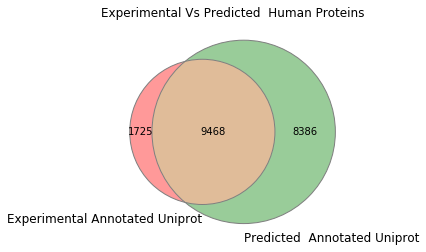

In [60]:
v=venn2(subsets = (set(Experimental_Uniprot), set(Predicted_Uniprot)), 
        set_labels = ('Experimental Annotated Uniprot', 'Predicted  Annotated Uniprot'))
c=venn2_circles(subsets = (set(Experimental_Uniprot), set(Predicted_Uniprot)),
                linewidth=1, color="grey")
plt.title("Experimental Vs Predicted  Human Proteins")
plt.savefig('Annotation Venn1.tiff', bbox_inches='tight',quality =95,orientation ='landscape',dpi =800)
plt.show()

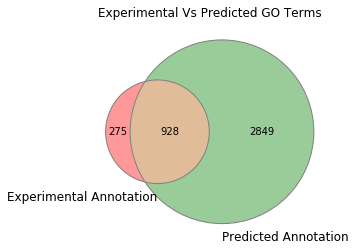

In [16]:
v=venn2(subsets = (set(Experimental_GO), set(Predicted_GO)), 
        set_labels = ('Experimental Annotation', 'Predicted Annotation'))
c=venn2_circles(subsets = (set(Experimental_GO), set(Predicted_GO)),
                linewidth=1, color="grey")
plt.title("Experimental Vs Predicted GO Terms")
#plt.savefig('Annotation Terms1.tiff', bbox_inches='tight',quality =95,orientation ='landscape',dpi =800)
plt.show()

In [17]:
Exp_cellmembrane_Uniprot=[]
Exp_celljunction_Uniprot=[]
Exp_cellprojection_Uniprot=[]
Exp_cytoplasm_Uniprot=[]
Exp_nucleus_Uniprot=[]
Exp_ribosome_Uniprot=[]
Exp_cytoskeleton_Uniprot=[]
Exp_centrosome_Uniprot=[]
Exp_mitochondrion_Uniprot=[]
Exp_ER_Uniprot=[]
Exp_Golgi_Uniprot=[]
Exp_lysosome_Uniprot=[]
Exp_vacuole_Uniprot=[]
Exp_peroxisome_Uniprot=[]
Exp_endosome_Uniprot=[]
Exp_nuclearmembrane_Uniprot=[]
Exp_mitochondrialmembrane_Uniprot=[]
Exp_ERmembrane_Uniprot=[]
Exp_Golgimembrane_Uniprot=[]
Exp_lysosomalmembrane_Uniprot=[]
Exp_vacuolarmembrane_Uniprot=[]
Exp_peroxisomalmembrane_Uniprot=[]
Exp_endosomemembrane_Uniprot=[]
Exp_othermembranes_Uniprot=[]
b=0
for b in range(0,len(Experimental_GO),1):
     if Experimental_GO[b] in cellmembrane_Go : Exp_cellmembrane_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in celljunction_Go : Exp_celljunction_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in cellprojection_Go : Exp_cellprojection_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in cytoplasm_Go : Exp_cytoplasm_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in nucleus_Go : Exp_nucleus_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in ribosome_Go : Exp_ribosome_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in cytoskeleton_Go : Exp_cytoskeleton_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in centrosome_Go : Exp_centrosome_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in mitochondrion_Go : Exp_mitochondrion_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in ER_Go : Exp_ER_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in Golgi_Go : Exp_Golgi_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in lysosome_Go : Exp_lysosome_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in vacuole_Go : Exp_vacuole_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in peroxisome_Go : Exp_peroxisome_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in endosome_Go : Exp_endosome_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in nuclearmembrane_Go : Exp_nuclearmembrane_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in mitochondrialmembrane_Go : Exp_mitochondrialmembrane_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in ERmembrane_Go : Exp_ERmembrane_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in Golgimembrane_Go : Exp_Golgimembrane_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in lysosomalmembrane_Go : Exp_lysosomalmembrane_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in vacuolarmembrane_Go : Exp_vacuolarmembrane_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in peroxisomalmembrane_Go : Exp_peroxisomalmembrane_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in endosomemembrane_Go : Exp_endosomemembrane_Uniprot.append(Experimental_Uniprot[b])
     if Experimental_GO[b] in othermembranes_Go : Exp_othermembranes_Uniprot.append(Experimental_Uniprot[b])

In [18]:
Pred_cellmembrane_Uniprot=[]
Pred_celljunction_Uniprot=[]
Pred_cellprojection_Uniprot=[]
Pred_cytoplasm_Uniprot=[]
Pred_nucleus_Uniprot=[]
Pred_ribosome_Uniprot=[]
Pred_cytoskeleton_Uniprot=[]
Pred_centrosome_Uniprot=[]
Pred_mitochondrion_Uniprot=[]
Pred_ER_Uniprot=[]
Pred_Golgi_Uniprot=[]
Pred_lysosome_Uniprot=[]
Pred_vacuole_Uniprot=[]
Pred_peroxisome_Uniprot=[]
Pred_endosome_Uniprot=[]
Pred_nuclearmembrane_Uniprot=[]
Pred_mitochondrialmembrane_Uniprot=[]
Pred_ERmembrane_Uniprot=[]
Pred_Golgimembrane_Uniprot=[]
Pred_lysosomalmembrane_Uniprot=[]
Pred_vacuolarmembrane_Uniprot=[]
Pred_peroxisomalmembrane_Uniprot=[]
Pred_endosomemembrane_Uniprot=[]
Pred_othermembranes_Uniprot=[]
b=0
for b in range(0,len(Predicted_GO),1):
     if Predicted_GO[b] in cellmembrane_Go : Pred_cellmembrane_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in celljunction_Go : Pred_celljunction_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in cellprojection_Go : Pred_cellprojection_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in cytoplasm_Go : Pred_cytoplasm_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in nucleus_Go : Pred_nucleus_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in ribosome_Go : Pred_ribosome_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in cytoskeleton_Go : Pred_cytoskeleton_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in centrosome_Go : Pred_centrosome_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in mitochondrion_Go : Pred_mitochondrion_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in ER_Go : Pred_ER_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in Golgi_Go : Pred_Golgi_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in lysosome_Go : Pred_lysosome_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in vacuole_Go : Pred_vacuole_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in peroxisome_Go : Pred_peroxisome_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in endosome_Go : Pred_endosome_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in nuclearmembrane_Go : Pred_nuclearmembrane_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in mitochondrialmembrane_Go : Pred_mitochondrialmembrane_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in ERmembrane_Go : Pred_ERmembrane_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in Golgimembrane_Go : Pred_Golgimembrane_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in lysosomalmembrane_Go : Pred_lysosomalmembrane_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in vacuolarmembrane_Go : Pred_vacuolarmembrane_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in peroxisomalmembrane_Go : Pred_peroxisomalmembrane_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in endosomemembrane_Go : Pred_endosomemembrane_Uniprot.append(Predicted_Uniprot[b])
     if Predicted_GO[b] in othermembranes_Go : Pred_othermembranes_Uniprot.append(Predicted_Uniprot[b])

In [19]:
Exp_cellmembrane_Uniprot=list(set(Exp_cellmembrane_Uniprot))
Exp_celljunction_Uniprot=list(set(Exp_celljunction_Uniprot))
Exp_cellprojection_Uniprot=list(set(Exp_cellprojection_Uniprot))
Exp_cytoplasm_Uniprot=list(set(Exp_cytoplasm_Uniprot))
Exp_nucleus_Uniprot=list(set(Exp_nucleus_Uniprot))
Exp_ribosome_Uniprot=list(set(Exp_ribosome_Uniprot))
Exp_cytoskeleton_Uniprot=list(set(Exp_cytoskeleton_Uniprot))
Exp_centrosome_Uniprot=list(set(Exp_centrosome_Uniprot))
Exp_mitochondrion_Uniprot=list(set(Exp_mitochondrion_Uniprot))
Exp_ER_Uniprot=list(set(Exp_ER_Uniprot))
Exp_Golgi_Uniprot=list(set(Exp_Golgi_Uniprot))
Exp_lysosome_Uniprot=list(set(Exp_lysosome_Uniprot))
Exp_vacuole_Uniprot=list(set(Exp_vacuole_Uniprot))
Exp_peroxisome_Uniprot=list(set(Exp_peroxisome_Uniprot))
Exp_endosome_Uniprot=list(set(Exp_endosome_Uniprot))
Exp_nuclearmembrane_Uniprot=list(set(Exp_nuclearmembrane_Uniprot))
Exp_mitochondrialmembrane_Uniprot=list(set(Exp_mitochondrialmembrane_Uniprot))
Exp_ERmembrane_Uniprot=list(set(Exp_ERmembrane_Uniprot))
Exp_Golgimembrane_Uniprot=list(set(Exp_Golgimembrane_Uniprot))
Exp_lysosomalmembrane_Uniprot=list(set(Exp_lysosomalmembrane_Uniprot))
Exp_vacuolarmembrane_Uniprot=list(set(Exp_vacuolarmembrane_Uniprot))
Exp_peroxisomalmembrane_Uniprot=list(set(Exp_peroxisomalmembrane_Uniprot))
Exp_endosomemembrane_Uniprot=list(set(Exp_endosomemembrane_Uniprot))
Exp_othermembranes_Uniprot=list(set(Exp_othermembranes_Uniprot))
Pred_cellmembrane_Uniprot=list(set(Pred_cellmembrane_Uniprot))
Pred_celljunction_Uniprot=list(set(Pred_celljunction_Uniprot))
Pred_cellprojection_Uniprot=list(set(Pred_cellprojection_Uniprot))
Pred_cytoplasm_Uniprot=list(set(Pred_cytoplasm_Uniprot))
Pred_nucleus_Uniprot=list(set(Pred_nucleus_Uniprot))
Pred_ribosome_Uniprot=list(set(Pred_ribosome_Uniprot))
Pred_cytoskeleton_Uniprot=list(set(Pred_cytoskeleton_Uniprot))
Pred_centrosome_Uniprot=list(set(Pred_centrosome_Uniprot))
Pred_mitochondrion_Uniprot=list(set(Pred_mitochondrion_Uniprot))
Pred_ER_Uniprot=list(set(Pred_ER_Uniprot))
Pred_Golgi_Uniprot=list(set(Pred_Golgi_Uniprot))
Pred_lysosome_Uniprot=list(set(Pred_lysosome_Uniprot))
Pred_vacuole_Uniprot=list(set(Pred_vacuole_Uniprot))
Pred_peroxisome_Uniprot=list(set(Pred_peroxisome_Uniprot))
Pred_endosome_Uniprot=list(set(Pred_endosome_Uniprot))
Pred_nuclearmembrane_Uniprot=list(set(Pred_nuclearmembrane_Uniprot))
Pred_mitochondrialmembrane_Uniprot=list(set(Pred_mitochondrialmembrane_Uniprot))
Pred_ERmembrane_Uniprot=list(set(Pred_ERmembrane_Uniprot))
Pred_Golgimembrane_Uniprot=list(set(Pred_Golgimembrane_Uniprot))
Pred_lysosomalmembrane_Uniprot=list(set(Pred_lysosomalmembrane_Uniprot))
Pred_vacuolarmembrane_Uniprot=list(set(Pred_vacuolarmembrane_Uniprot))
Pred_peroxisomalmembrane_Uniprot=list(set(Pred_peroxisomalmembrane_Uniprot))
Pred_endosomemembrane_Uniprot=list(set(Pred_endosomemembrane_Uniprot))
Pred_othermembranes_Uniprot=list(set(Pred_othermembranes_Uniprot))

In [20]:
with open('cellmembrane_ExpUni.txt', 'w') as f:
    for item in Exp_cellmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('celljunction_ExpUni.txt', 'w') as f:
    for item in Exp_celljunction_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('cellprojection_ExpUni.txt', 'w') as f:
    for item in Exp_cellprojection_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('cytoplasm_ExpUni.txt', 'w') as f:
    for item in Exp_cytoplasm_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('nucleus_ExpUni.txt', 'w') as f:
    for item in Exp_nucleus_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('ribosome_ExpUni.txt', 'w') as f:
    for item in Exp_ribosome_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('cytoskeleton_ExpUni.txt', 'w') as f:
    for item in Exp_cytoskeleton_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('centrosome_ExpUni.txt', 'w') as f:
    for item in Exp_centrosome_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('mitochondrion_ExpUni.txt', 'w') as f:
    for item in Exp_mitochondrion_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('ER_ExpUni.txt', 'w') as f:
    for item in Exp_ER_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('Golgi_ExpUni.txt', 'w') as f:
    for item in Exp_Golgi_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('lysosome_ExpUni.txt', 'w') as f:
    for item in Exp_lysosome_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('vacuole_ExpUni.txt', 'w') as f:
    for item in Exp_vacuole_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('peroxisome_ExpUni.txt', 'w') as f:
    for item in Exp_peroxisome_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('endosome_ExpUni.txt', 'w') as f:
    for item in Exp_endosome_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('nuclearmembrane_ExpUni.txt', 'w') as f:
    for item in Exp_nuclearmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('mitochondrialmembrane_ExpUni.txt', 'w') as f:
    for item in Exp_mitochondrialmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('ERmembrane_ExpUni.txt', 'w') as f:
    for item in Exp_ERmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('Golgimembrane_ExpUni.txt', 'w') as f:
    for item in Exp_Golgimembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('lysosomalmembrane_ExpUni.txt', 'w') as f:
    for item in Exp_lysosomalmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('vacuolarmembrane_ExpUni.txt', 'w') as f:
    for item in Exp_vacuolarmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('peroxisomalmembrane_ExpUni.txt', 'w') as f:
    for item in Exp_peroxisomalmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('endosomemembrane_ExpUni.txt', 'w') as f:
    for item in Exp_endosomemembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('othermembranes_ExpUni.txt', 'w') as f:
    for item in Exp_othermembranes_Uniprot:
        f.write("%s\n" % item)

In [21]:
with open('cellmembrane_PredUni.txt', 'w') as f:
    for item in Pred_cellmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('celljunction_PredUni.txt', 'w') as f:
    for item in Pred_celljunction_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('cellprojection_PredUni.txt', 'w') as f:
    for item in Pred_cellprojection_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('cytoplasm_PredUni.txt', 'w') as f:
    for item in Pred_cytoplasm_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('nucleus_PredUni.txt', 'w') as f:
    for item in Pred_nucleus_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('ribosome_PredUni.txt', 'w') as f:
    for item in Pred_ribosome_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('cytoskeleton_PredUni.txt', 'w') as f:
    for item in Pred_cytoskeleton_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('centrosome_PredUni.txt', 'w') as f:
    for item in Pred_centrosome_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('mitochondrion_PredUni.txt', 'w') as f:
    for item in Pred_mitochondrion_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('ER_PredUni.txt', 'w') as f:
    for item in Pred_ER_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('Golgi_PredUni.txt', 'w') as f:
    for item in Pred_Golgi_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('lysosome_PredUni.txt', 'w') as f:
    for item in Pred_lysosome_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('vacuole_PredUni.txt', 'w') as f:
    for item in Pred_vacuole_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('peroxisome_PredUni.txt', 'w') as f:
    for item in Pred_peroxisome_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('endosome_PredUni.txt', 'w') as f:
    for item in Pred_endosome_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('nuclearmembrane_PredUni.txt', 'w') as f:
    for item in Pred_nuclearmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('mitochondrialmembrane_PredUni.txt', 'w') as f:
    for item in Pred_mitochondrialmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('ERmembrane_PredUni.txt', 'w') as f:
    for item in Pred_ERmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('Golgimembrane_PredUni.txt', 'w') as f:
    for item in Pred_Golgimembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('lysosomalmembrane_PredUni.txt', 'w') as f:
    for item in Pred_lysosomalmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('vacuolarmembrane_PredUni.txt', 'w') as f:
    for item in Pred_vacuolarmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('peroxisomalmembrane_PredUni.txt', 'w') as f:
    for item in Pred_peroxisomalmembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('endosomemembrane_PredUni.txt', 'w') as f:
    for item in Pred_endosomemembrane_Uniprot:
        f.write("%s\n" % item)
############################################################################################
with open('othermembranes_PredUni.txt', 'w') as f:
    for item in Pred_othermembranes_Uniprot:
        f.write("%s\n" % item)

In [22]:
print(len(Exp_cellmembrane_Uniprot))
print(len(Exp_celljunction_Uniprot))
print(len(Exp_cellprojection_Uniprot))
print(len(Exp_cytoplasm_Uniprot))
print(len(Exp_nucleus_Uniprot))
print(len(Exp_ribosome_Uniprot))
print(len(Exp_cytoskeleton_Uniprot))
print(len(Exp_centrosome_Uniprot))
print(len(Exp_mitochondrion_Uniprot))
print(len(Exp_ER_Uniprot))
print(len(Exp_Golgi_Uniprot))
print(len(Exp_lysosome_Uniprot))
print(len(Exp_vacuole_Uniprot))
print(len(Exp_peroxisome_Uniprot))
print(len(Exp_endosome_Uniprot))
print(len(Exp_nuclearmembrane_Uniprot))
print(len(Exp_mitochondrialmembrane_Uniprot))
print(len(Exp_ERmembrane_Uniprot))
print(len(Exp_Golgimembrane_Uniprot))
print(len(Exp_lysosomalmembrane_Uniprot))
print(len(Exp_vacuolarmembrane_Uniprot))
print(len(Exp_peroxisomalmembrane_Uniprot))
print(len(Exp_endosomemembrane_Uniprot))
print(len(Exp_othermembranes_Uniprot))
print(len(Pred_cellmembrane_Uniprot))
print(len(Pred_celljunction_Uniprot))
print(len(Pred_cellprojection_Uniprot))
print(len(Pred_cytoplasm_Uniprot))
print(len(Pred_nucleus_Uniprot))
print(len(Pred_ribosome_Uniprot))
print(len(Pred_cytoskeleton_Uniprot))
print(len(Pred_centrosome_Uniprot))
print(len(Pred_mitochondrion_Uniprot))
print(len(Pred_ER_Uniprot))
print(len(Pred_Golgi_Uniprot))
print(len(Pred_lysosome_Uniprot))
print(len(Pred_vacuole_Uniprot))
print(len(Pred_peroxisome_Uniprot))
print(len(Pred_endosome_Uniprot))
print(len(Pred_nuclearmembrane_Uniprot))
print(len(Pred_mitochondrialmembrane_Uniprot))
print(len(Pred_ERmembrane_Uniprot))
print(len(Pred_Golgimembrane_Uniprot))
print(len(Pred_lysosomalmembrane_Uniprot))
print(len(Pred_vacuolarmembrane_Uniprot))
print(len(Pred_peroxisomalmembrane_Uniprot))
print(len(Pred_endosomemembrane_Uniprot))
print(len(Pred_othermembranes_Uniprot))

2417
3009
486
4315
4796
165
1090
521
874
634
639
150
187
79
321
167
240
232
193
177
199
33
142
1678
3633
2502
2149
5093
5087
179
1619
264
814
668
566
163
220
59
385
139
395
596
532
111
167
36
286
4003


In [23]:
All_cellmembrane_Uniprot=Exp_cellmembrane_Uniprot+Pred_cellmembrane_Uniprot         
All_celljunction_Uniprot=Exp_celljunction_Uniprot+Pred_celljunction_Uniprot
All_cellprojection_Uniprot=Exp_cellprojection_Uniprot+Pred_cellprojection_Uniprot
All_cytoplasm_Uniprot=Exp_cytoplasm_Uniprot+Pred_cytoplasm_Uniprot
All_nucleus_Uniprot=Exp_nucleus_Uniprot+Pred_nucleus_Uniprot
All_ribosome_Uniprot=Exp_ribosome_Uniprot+Pred_ribosome_Uniprot
All_cytoskeleton_Uniprot=Exp_cytoskeleton_Uniprot+Pred_cytoskeleton_Uniprot
All_centrosome_Uniprot=Exp_centrosome_Uniprot+Pred_centrosome_Uniprot
All_mitochondrion_Uniprot=Exp_mitochondrion_Uniprot+Pred_mitochondrion_Uniprot
All_ER_Uniprot=Exp_ER_Uniprot+Pred_ER_Uniprot
All_Golgi_Uniprot=Exp_Golgi_Uniprot+Pred_Golgi_Uniprot
All_lysosome_Uniprot=Exp_lysosome_Uniprot+Pred_lysosome_Uniprot
All_vacuole_Uniprot=Exp_vacuole_Uniprot+Pred_vacuole_Uniprot
All_peroxisome_Uniprot=Exp_peroxisome_Uniprot+Pred_peroxisome_Uniprot
All_endosome_Uniprot=Exp_endosome_Uniprot+Pred_endosome_Uniprot
All_nuclearmembrane_Uniprot=Exp_nuclearmembrane_Uniprot+Pred_nuclearmembrane_Uniprot
All_mitochondrialmembrane_Uniprot=Exp_mitochondrialmembrane_Uniprot+Pred_mitochondrialmembrane_Uniprot
All_ERmembrane_Uniprot=Exp_ERmembrane_Uniprot+Pred_ERmembrane_Uniprot
All_Golgimembrane_Uniprot=Exp_Golgimembrane_Uniprot+Pred_Golgimembrane_Uniprot
All_lysosomalmembrane_Uniprot=Exp_lysosomalmembrane_Uniprot+Pred_lysosomalmembrane_Uniprot
All_vacuolarmembrane_Uniprot=Exp_vacuolarmembrane_Uniprot+Pred_vacuolarmembrane_Uniprot
All_peroxisomalmembrane_Uniprot=Exp_peroxisomalmembrane_Uniprot+Pred_peroxisomalmembrane_Uniprot
All_endosomemembrane_Uniprot=Exp_endosomemembrane_Uniprot+Pred_endosomemembrane_Uniprot
All_othermembranes_Uniprot=Exp_othermembranes_Uniprot+Pred_othermembranes_Uniprot

In [24]:
print(len(set(All_cellmembrane_Uniprot)))
print(len(set(All_celljunction_Uniprot)))
print(len(set(All_cellprojection_Uniprot)))
print(len(set(All_cytoplasm_Uniprot)))
print(len(set(All_nucleus_Uniprot)))
print(len(set(All_ribosome_Uniprot)))
print(len(set(All_cytoskeleton_Uniprot)))
print(len(set(All_centrosome_Uniprot)))
print(len(set(All_mitochondrion_Uniprot)))
print(len(set(All_ER_Uniprot)))
print(len(set(All_Golgi_Uniprot)))
print(len(set(All_lysosome_Uniprot)))
print(len(set(All_vacuole_Uniprot)))
print(len(set(All_peroxisome_Uniprot)))
print(len(set(All_endosome_Uniprot)))
print(len(set(All_nuclearmembrane_Uniprot)))
print(len(set(All_mitochondrialmembrane_Uniprot)))
print(len(set(All_ERmembrane_Uniprot)))
print(len(set(All_Golgimembrane_Uniprot)))
print(len(set(All_lysosomalmembrane_Uniprot)))
print(len(set(All_vacuolarmembrane_Uniprot)))
print(len(set(All_peroxisomalmembrane_Uniprot)))
print(len(set(All_endosomemembrane_Uniprot)))
print(len(set(All_othermembranes_Uniprot)))

4832
4819
2371
7554
7332
224
2264
646
1328
1117
1057
271
344
106
604
293
518
732
645
261
320
54
370
5263
